#**CREDIT SCORE PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

##Load data to python environment

In [ ]:
df = pd.read_csv('/content/credit.csv')
pd.set_option('display.max_columns', None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.5,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.5,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.5,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,3.0,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


##Checking info of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

***There are 21 numerical features (18 float and 3 integer) and 7 categorical features in the data.***

##Check for Null values

In [ ]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

***There are no null values.***

##Check Statistical summary

In [ ]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


##Check for unique values

In [ ]:
(df.nunique()).sort_values(ascending=False)

ID                          100000
Credit_Utilization_Ratio    100000
Monthly_Balance              98494
Monthly_Inhand_Salary        13241
Customer_ID                  12500
SSN                          12500
Annual_Income                12488
Amount_invested_monthly      12261
Outstanding_Debt             12203
Total_EMI_per_month          11890
Name                         10128
Type_of_Loan                  6261
Changed_Credit_Limit          3452
Credit_History_Age             404
Delay_from_due_date             63
Age                             43
Interest_Rate                   34
Num_of_Delayed_Payment          26
Num_Credit_Inquiries            18
Occupation                      15
Num_Credit_Card                 12
Num_Bank_Accounts               12
Num_of_Loan                     10
Month                            8
Payment_Behaviour                6
Credit_Mix                       3
Payment_of_Min_Amount            3
Credit_Score                     3
dtype: int64

***ID and Credit_Utilization_Ratio has all unique values***

##Check for duplicates

In [ ]:
df.duplicated().sum()

0

***No duplicates***

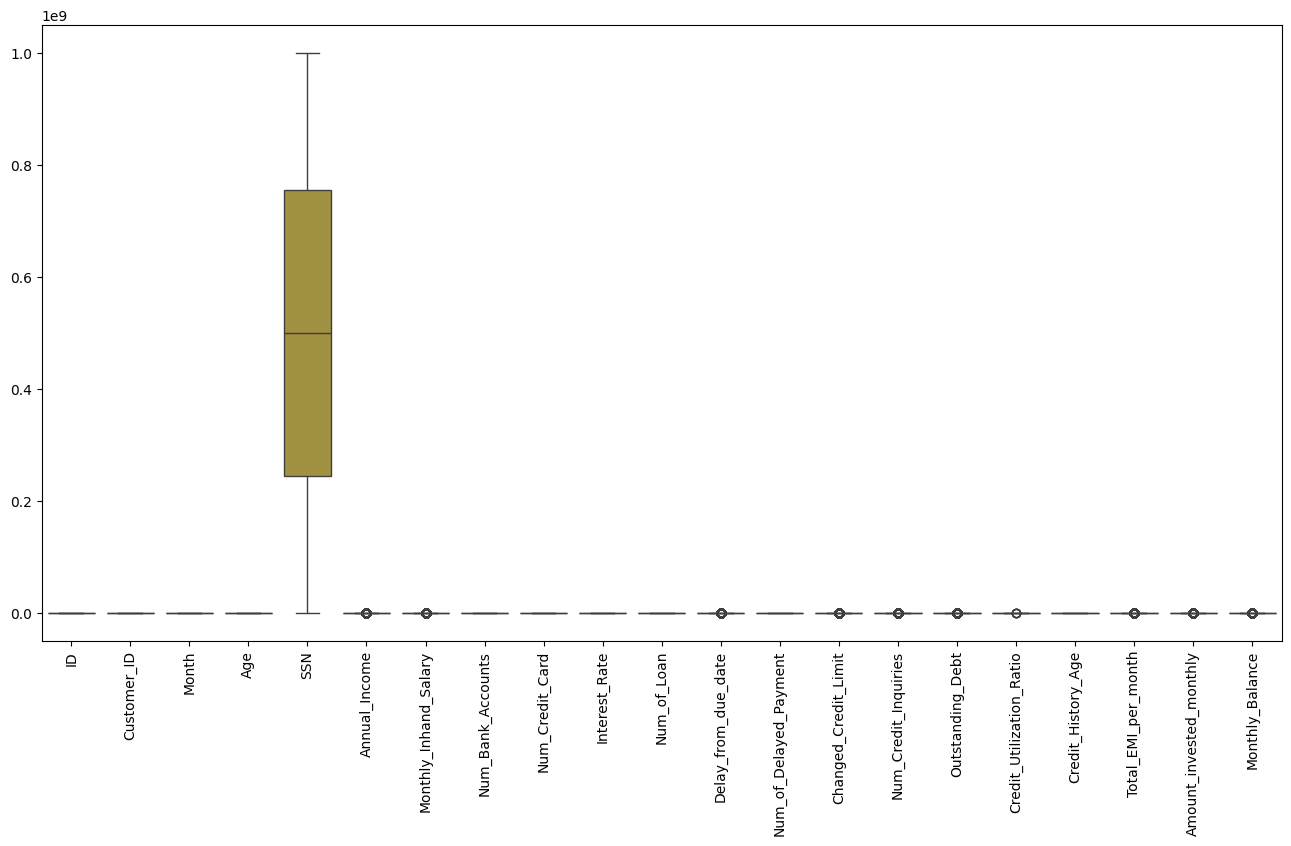

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***Outliers are present in 10 features.All these are genuine outliers so we are keeping it.***

##Drop unnecessary Columns

In [ ]:
# Not useful for trainig model

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

df.drop(columns=columns_to_drop, inplace=True)

##Encoding

In [ ]:
##Encoding Target column
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df['Credit_Score_Encoded'] = encoder.fit_transform(df[['Credit_Score']])

In [ ]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [ ]:
df['Credit_Score_Encoded'].value_counts()

Credit_Score_Encoded
1.0    53174
0.0    28998
2.0    17828
Name: count, dtype: int64

In [ ]:
# Encoding Occupation

label_encoder = LabelEncoder()
df['Occupation_Encoded'] = label_encoder.fit_transform(df['Occupation'])

In [ ]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df['Credit_Mix_Encoded'] = encoder.fit_transform(df[['Credit_Mix']])

In [ ]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

df['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(df[['Payment_Behaviour']])

In [ ]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)

df['Total_Num_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Calculate the total outstanding debt per account

df['Debt_Per_Account'] = df['Outstanding_Debt'] / df['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

# Calculate the total number of delayed payments per account

df['Delayed_Payments_Per_Account'] = df['Num_of_Delayed_Payment'] / df['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)

df['Total_Monthly_Expenses'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']


##Mutual information score

***Mutual Information Score help to recognize the most valuble variables for prediction***

In [ ]:
from sklearn.feature_selection import mutual_info_classif
categorical_columns = df.select_dtypes(include=['object']).columns

data_encoded =df.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.025391324287107997
Feature 'Annual_Income': Mutual Information Score = 0.6235652462929047
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.10413988740979141
Feature 'Num_Credit_Card': Mutual Information Score = 0.11272325048148302
Feature 'Interest_Rate': Mutual Information Score = 0.17076180514394612
Feature 'Num_of_Loan': Mutual Information Score = 0.0898098603628461
Feature 'Delay_from_due_date': Mutual Information Score = 0.12244446544361365
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.09029187397536886
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.1036941780801437
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.11876762306043243
Feature 'Outstanding_Debt': Mutual Information Score = 0.6121114304707531
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.10886531772465169
Feature 'Total_EMI_per_month': Mutual 

##Plotting Mutual Information Score

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

##Droping low MI score values

In [ ]:
columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,1.000000
1,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,0.571429
2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,1.000000
3,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,0.571429
4,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,0.571429


##Splitting Data

In [ ]:
y = df['Credit_Score_Encoded']

x= df[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_Mix_Encoded', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)
print("Accuracy on training set:", dt_clf.score(x_train, y_train))

Accuracy on training set: 0.95235


##Cross Validation

In [ ]:
kfold_validator=KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, x_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.748     0.751875  0.7478125 0.7525    0.748625 ]
Average cross-validation score: 0.7497624999999999


Accuracy on original test set: 0.7618


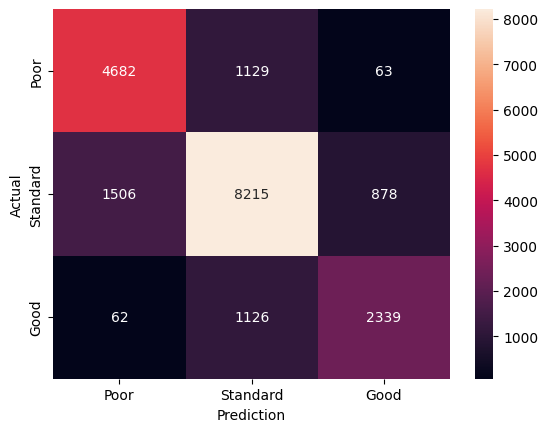


Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.75      0.80      0.77      5874
         1.0       0.78      0.78      0.78     10599
         2.0       0.71      0.66      0.69      3527

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



In [ ]:
dt_clf.fit(x_train, y_train)

y_pred = dt_clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Poor','Standard','Good'],
            yticklabels=['Poor','Standard','Good'])
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('Actual',fontsize=10)
plt.show()


print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))

In [ ]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[dt_clf.score(x_train,y_train)],[accuracy_score(y_test,y_pred)],[precision_score(y_test,y_pred,average='macro')],[recall_score(y_test,y_pred,average='macro')],[f1_score(y_test,y_pred,average='macro')]],columns=['Decision Tree Classifier'])
table.index=metric
table

,Decision Tree Classifier
Train Accuracy,0.952350
Test Accuracy,0.761800
Precision,0.748951
Recall,0.745105
F1 Score,0.746468


***NOTE:The avarage cross validation score and accuracy score is high for Random forest classifier.But I selected Decision tree model for our prediction because the model.pkl file is too large(1.5GB).***

In [ ]:
df['Credit_Score_Encoded'].value_counts()

Credit_Score_Encoded
1.0    53174
0.0    28998
2.0    17828
Name: count, dtype: int64

In [ ]:
df.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,1.000000
1,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,0.571429
2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,1.000000
3,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,0.571429
4,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,49.574949,2.0,2.0,7.0,115.711429,0.042376,0.571429


In [ ]:
df.tail()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
99995,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,11.5,3.0,502.38,35.104023,0.0,2.0,10.0,50.238,0.012677,0.7
99996,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,11.5,3.0,502.38,35.104023,0.0,2.0,10.0,50.238,0.012677,0.7
99997,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,11.5,3.0,502.38,35.104023,0.0,2.0,10.0,50.238,0.012677,0.6
99998,39628.99,4.0,6.0,7.0,2.0,20.0,6.0,11.5,3.0,502.38,35.104023,1.0,2.0,10.0,50.238,0.012677,0.6
99999,39628.99,4.0,6.0,7.0,2.0,18.0,6.0,11.5,3.0,502.38,35.104023,0.0,2.0,10.0,50.238,0.012677,0.6


##Prediction

In [ ]:
prediction=dt_clf.predict([[19114.12,	3.0	,4.0,	3.0,	4.0	,3.0,	7.0,	11.27,	4.0	,809.98,49.574949,2.0	,7.0	,115.711429,	0.042376	,1.000000]])
prediction[0]

2.0

In [ ]:
prediction=dt_clf.predict([[39628.99,	4.0,	6.0,	7.0	,2.0,	23.0,	7.0,	11.5,	3.0	,502.38	,35.104023,	2.0,	10.0,	50.238	,0.012677	,0.7	]])
prediction[0]

0.0

In [ ]:
prediction=dt_clf.predict([[39628.99,	4.0	,6.0,	7.0,	2.0	,20.0	,6.0,	11.5,3.0,	502.38,35.104023,2.0,	10.0,	50.238,	0.012677	,0.6	]])
prediction[0]

1.0

##Pickling

In [ ]:
with open('model.pkl', 'wb') as file:
  pickle.dump(dt_clf, file)